In [1]:
from sklearn.datasets import load_iris
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans, SpectralClustering, DBSCAN, AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [2]:
iris = load_iris()
X = iris.data

In [3]:
#Construction tuple
estimators = [
    # Clustering with K-means
    ("kmeans", KMeans(n_clusters=3,n_init="auto")),
    # Clustering with Spectral Clustering
    ("spectral",  SpectralClustering(n_clusters=3)),
    # Clustering with DBSCAN
    ("dbscan", DBSCAN(eps=0.3, min_samples=5)),
    # Clustering with Agglomerative Clustering
    ("agglo", AgglomerativeClustering(n_clusters=3))
]

In [4]:
#The training model calculates the Silhouette Coefficient, Davis-Bouldin Index
for name, estimator in estimators:
    # Train the model
    estimator.fit(X)
    labels = estimator.labels_
    # Calculate performance metrics
    silhouette = silhouette_score(X, labels)
    dbi = davies_bouldin_score(X, labels)
    print(f"{name} Silhouette Coefficient: {silhouette}")
    print(f"{name} Davies-Bouldin Index: {dbi}")

kmeans Silhouette Coefficient: 0.5528190123564095
kmeans Davies-Bouldin Index: 0.6619715465007465
spectral Silhouette Coefficient: 0.5553062646081594
spectral Davies-Bouldin Index: 0.6538599267578205
dbscan Silhouette Coefficient: -0.05206429641095576
dbscan Davies-Bouldin Index: 2.400942109899732
agglo Silhouette Coefficient: 0.5543236611296419
agglo Davies-Bouldin Index: 0.6562564540642021


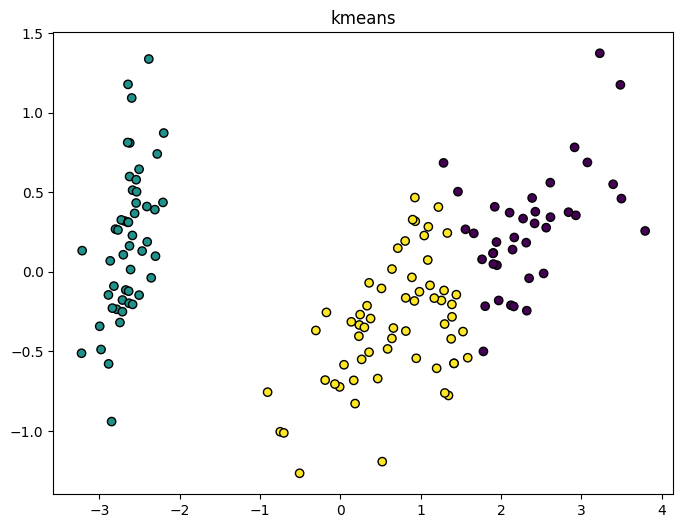

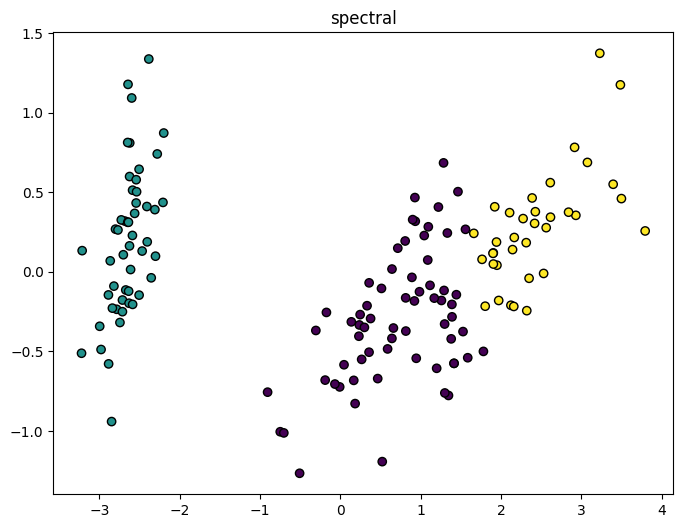

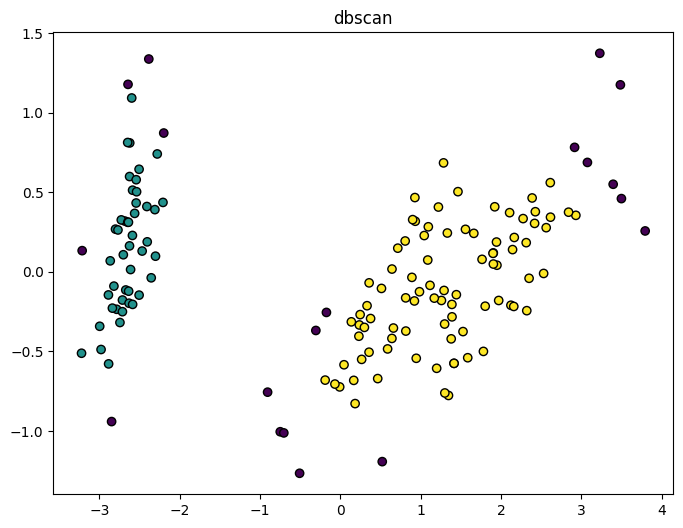

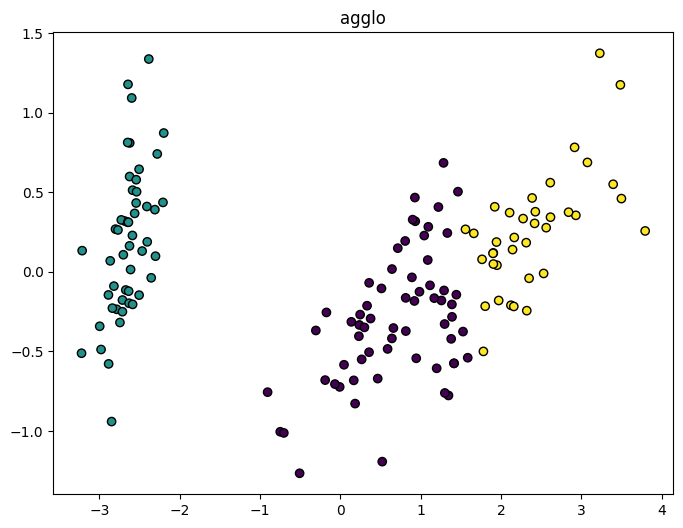

In [5]:
# plot 2D
pca_2 = PCA(n_components=2)
reduced_2 = pca_2.fit_transform(X)
for name, estimator in estimators:
    fig = plt.figure(figsize=(8, 6)) 
    estimator.fit(reduced_2)
    labels_2 = estimator.labels_
    plt.scatter(reduced_2[:, 0], reduced_2[:, 1], c=labels_2.astype(np.float64), edgecolor='k')
    plt.title(name)
    plt.show()

<Figure size 1000x800 with 0 Axes>

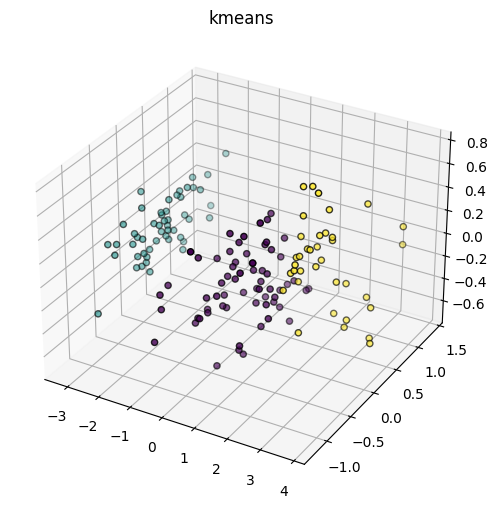

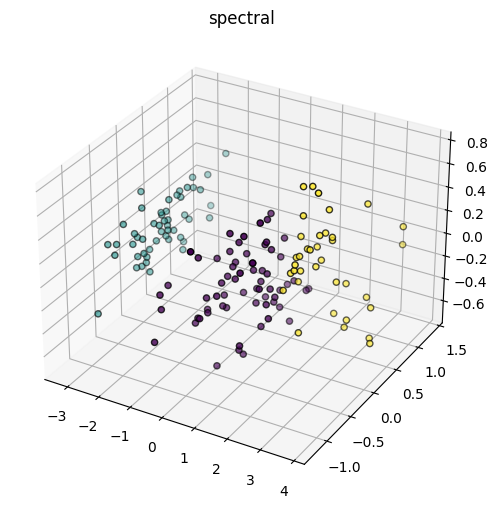

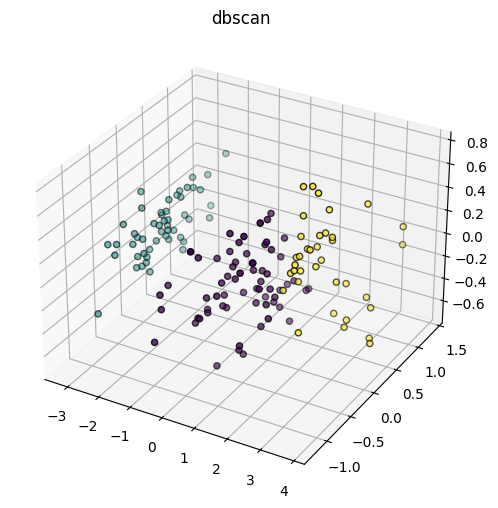

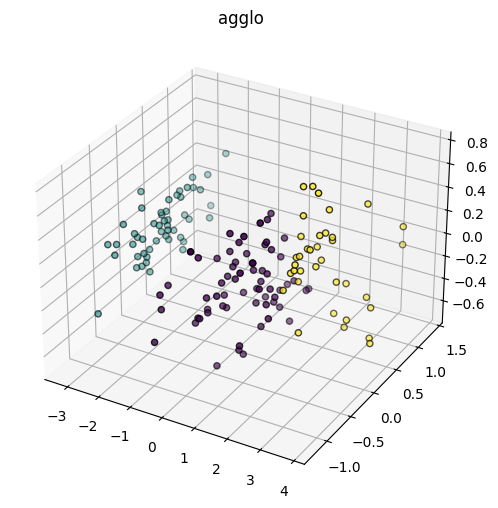

In [6]:
# plot 3D
pca_3 = PCA(n_components=3)
reduced_3 = pca_3.fit_transform(X)
fig = plt.figure(figsize=(10, 8))
titles = ["kmeans", "spectral", "dbscan ", "agglo"]
for name, estimator in estimators:
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    estimator.fit(reduced_3)
    labels_3 = estimator.labels_
    ax.scatter(reduced_3[:, 0], reduced_3[:, 1], reduced_3[:, 2], c=labels.astype(np.float64), edgecolor='k')
    plt.title(name)